In [1]:
df = pd.read_csv('data.csv')

In [2]:
df['nextmonth'] = df.iloc[1:, :].reset_index(drop=True)['KBR']
def foo(k):
    if k["KBR"] == k["nextmonth"] or np.isnan(k['nextmonth']) :return 'leave'
    elif k["KBR"] != k["nextmonth"]:return 'change'

df['Y'] = df.apply(foo, axis=1)
y = df['Y'].apply(lambda x: 0 if x=='leave' else 1)

df.drop('nextmonth', axis=1, inplace=True)

In [3]:
debt = pd.read_csv('debt.csv')

debt['index']=debt['index'].apply(lambda x:x[:4] + '-' +str(int(x[5:6])*3 if x[5:6]=='4' else '0' +str(int(x[5:6])*3)))

debt.rename({'index':'date'}, axis=1, inplace=True)

debt.drop(60, inplace=True)

minus1 = debt['date'].apply(lambda x: x[:5] +str(int(x[5:])-1)  if x[5:7]=='12' else x[:5]+ '0'+ str(int(x[5:])-1))
minus2 = debt['date'].apply(lambda x: x[:5] +str(int(x[5:])-2)  if x[5:7]=='12' else x[:5]+ '0'+ str(int(x[5:])-2))

m1 = pd.concat([minus1, debt['debt']], axis=1)
m2 = pd.concat([minus2, debt['debt']], axis=1)

debt = pd.concat([debt, m1, m2]).sort_values('date')

debt.reset_index(drop=True, inplace=True)

In [4]:
df.drop(['FFR', 'R_gap', 'CLI', 'Y'], axis=1, inplace=True)

In [5]:
ddf = pd.merge(df, debt, on='date', how='left')
ddf['debt']=ddf['debt'].fillna(ddf['debt'].median())

---

KBR : Korea Basement Rate

FFR : FED Fund Rate

CPI : Customer Price Index

debt : House Debt - 2001년 이전 값은 median값으로 fillna

한국은행이 채택하고 있는 통화정책 운영체제로서 통화량 등의 중간목표를 두지 않고 정책의 최종 목표인 “물가상승률”자체를 목표로 설정하고 중기적 시계에서 이를 달성하려 하는 통화정책 운영방식이다.

금통위 2016 이전 - 매달

2017년부터 6주에 한번 연 8회.

In [6]:
%matplotlib inline

In [7]:
ddf.tail()

,date,KBR,FFRm,CPI,debt
217,2017-08,1.25,1.16,2.6,2.162565
218,2017-10,1.25,1.16,1.8,2.118003
219,2017-11,1.50,1.16,1.3,2.118003
220,2018-01,1.50,1.42,1.0,2.118003
221,2018-02,1.50,1.42,1.4,2.118003


In [8]:
ddf.describe()

,KBR,FFRm,CPI,debt
count,222.000000,222.000000,222.000000,222.000000
mean,3.296171,1.892793,2.524324,2.027395
std,1.227447,2.085278,1.221579,0.839712
min,1.250000,0.070000,0.300000,0.000000
25%,2.250000,0.150000,1.500000,1.390498
50%,3.250000,1.000000,2.500000,2.118003
75%,4.250000,3.665000,3.400000,2.428571
max,5.250000,6.510000,5.900000,4.159132


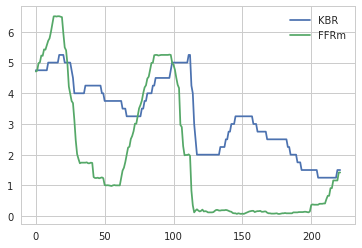

In [9]:
ddf[['KBR', 'FFRm']].plot()
plt.show()

1999.07 - 2001.03 
: IMF, 닷컴 버블 

2005.07 - 2007.07 
: 

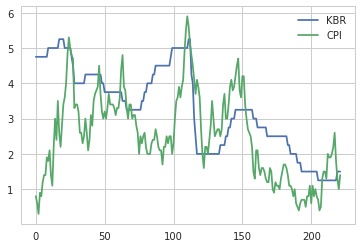

In [11]:
ddf[['KBR', 'CPI']].plot()
plt.show()

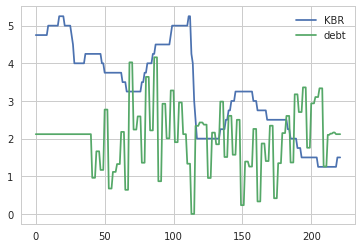

In [12]:
ddf[['KBR', 'debt']].plot()
plt.show()

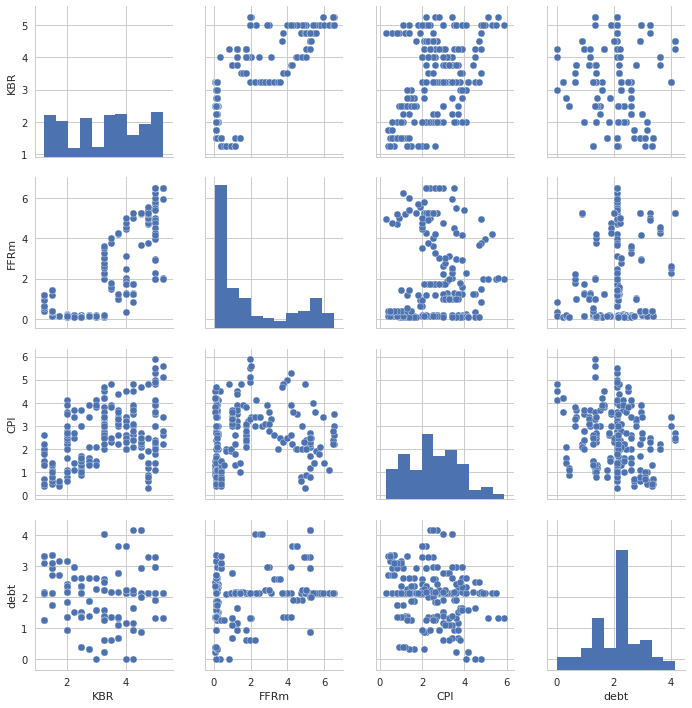

In [13]:
sns.pairplot(ddf)
plt.show()

In [14]:
ddf.corr()

,KBR,FFRm,CPI,debt
KBR,1.000000,0.767111,0.472129,-0.058494
FFRm,0.767111,1.000000,0.081499,0.217395
CPI,0.472129,0.081499,1.000000,-0.212357
debt,-0.058494,0.217395,-0.212357,1.000000


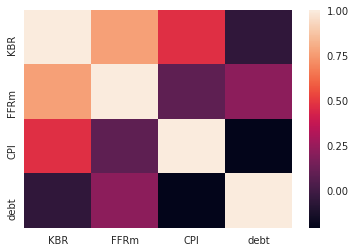

In [15]:
sns.heatmap(ddf.corr())
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ddf.drop(['date', 'KBR'], axis=1).values, i) for i in range(ddf.drop(['date', 'KBR'], axis=1).shape[1])]
vif["features"] = ddf.drop(['date', 'KBR'], axis=1).columns
vif

,VIF Factor,features
0,1.953068,FFRm
1,2.853851,CPI
2,3.213983,debt


In [9]:
ddf.to_csv('edited_debt.csv', index=False)
df.to_csv('edited.csv', index=False)

---